In [491]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import sys


In [492]:
filename = 'courseRecSys.xlsx'
splitProp = 0.95

In [493]:
def read_data(filename):
    df = pd.read_excel(filename,
    header=0,
    index_col=False,
    keep_default_na=True
    )
    return df

In [494]:
def preprocess(df):
    df=df.drop(['Start time','Completion time','Email','Name','Name(not mandatory)\n','ID'], axis=1)
    
    df["avg"] = df.mean(axis = 0, skipna=True, numeric_only=True)
    df=df.apply(lambda x: x.fillna(x.mean()),axis=0)
    df = df.drop(["avg"],axis =1)
    return df

In [497]:
df=read_data(filename)
df = preprocess(df)
df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.620098,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.600000,0.423286,0.396622,0.510897
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.200000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.500000,0.423286,0.396622,0.510897
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.800000,0.900000,1.000000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.400000,0.423286,0.396622,0.510897
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.750000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.800000,0.452708,0.423286,0.800000,0.510897
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.400000,0.400000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.700000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.000000,0.423286,0.396622,0.510897
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.000000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.200000
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.500000,0.400000,0.200000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,1.000000,0.423286,0.396622,1.000000
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,0.620098,0.572638,0.700000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.510897


change 0.5 to average of ratings of that user

In [498]:
train,test = train_test_split(df,train_size=splitProp, random_state=42,shuffle = True)

In [499]:
df.shape

(162, 25)

In [500]:
test.shape

(9, 25)

In [501]:
df.isna().sum()

Data Structures and Algorithms                                0
Computer Architecture\n                                       0
Discrete Mathematics\n                                        0
Economics                                                     0
Programming-2                                                 0
Machine Learning\n                                            0
Mathematics For Machine Learning\n                            0
Visual Recognition\n                                          0
Natural Language Processing\n                                 0
Reinforcement Learning                                        0
Software Production Engineering\n                             0
Computer Graphics\n                                           0
Data Visualization\n                                          0
Programming Languages\n                                       0
Cloud Computing\n                                             0
Digital CMOS VLSI Design                

In [502]:
courses = df.columns
courses

Index(['Data Structures and Algorithms', 'Computer Architecture\n',
       'Discrete Mathematics\n', 'Economics', 'Programming-2',
       'Machine Learning\n', 'Mathematics For Machine Learning\n',
       'Visual Recognition\n', 'Natural Language Processing\n',
       'Reinforcement Learning', 'Software Production Engineering\n',
       'Computer Graphics\n', 'Data Visualization\n',
       'Programming Languages\n', 'Cloud Computing\n',
       'Digital CMOS VLSI Design ', 'System design with FPGA ', 'ASIC design ',
       'VLSI Architecture Design\n',
       'High level synthesis and optimization of Digital Circuits ',
       'Digital Sociology ', 'Privacy in the Digital Age',
       'Technology Ethics and AI ', 'Techno-economics of networks ',
       'The Web and the Mind '],
      dtype='object')

In [503]:
core_courses = ['Data Structures and Algorithms','Computer Architecture\n','Discrete Mathematics\n','Economics','Programming-2']

In [504]:
def visualize(point):
    wcss = []  #Within Cluster Sum of Squares
    for number_of_clusters in range(1, 15): 
        kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
        kmeans.fit(df[core_courses]) 
        wcss.append(kmeans.inertia_)
    ks = np.arange(1,15,1)
    plt.plot(ks, wcss)
    plt.axvline(point, linestyle='--', color='r')
    return wcss

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[82.11226015529863,
 63.24078648485308,
 51.758327711871,
 44.96053632709337,
 39.893986878723226,
 36.14482368312088,
 33.39870202326003,
 30.569535969351197,
 28.142142856387906,
 25.495720837938936,
 24.303521924994456,
 22.250775245363172,
 21.265056428481255,
 19.7185773653146]

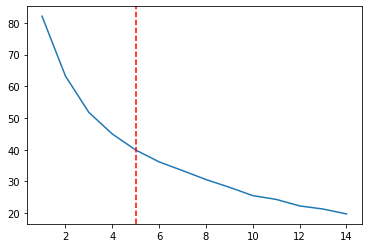

In [505]:
visualize(5)

In [506]:
def K_means(df, num_clusters, iters):
    np_dat = df.to_numpy()
    # Initialize the centroids
    range_min = np.min(np_dat, axis = 0)
    range_max = np.max(np_dat, axis = 0)
    curr_centroids = []
    np.random.seed(75)
    for i in range(num_clusters):
        curr_centroids.append(np.random.uniform(range_min, range_max))
    clusters = {}
    for it in range(iters):
        # Repopulate clusters
        clusters.clear()
        for j in range(np_dat.shape[0]):
            datapoint = np_dat[j]
            min = sys.maxsize
            min_index = 10
            for k in range(num_clusters):
                dist = np.linalg.norm(curr_centroids[k] - datapoint)
                if(dist < min):
                    min = dist
                    min_index = k
            if(clusters.get(str(min_index)) == None):
                clusters[str(min_index)] = []
            clusters[str(min_index)].append(j)
        
        # Recalculate Centroids
        new_centroids = []
        for k in range(num_clusters):
            key = str(k)
            if(clusters.get(key) == None): 
                n_centr = curr_centroids[k]
                #n_centr = np.random.uniform(range_min, range_max)
            else: n_centr = np.mean(np_dat[np.array(clusters[key])], axis = 0)
            new_centroids.append(n_centr)
        
        #if((np.not_equal(new_centroids, curr_centroids).any()) != True ): break
        curr_centroids = new_centroids
        #print(it)
    return clusters


In [507]:
def get_clustered_df(df,num_clusters):
    """ kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
    clustered_matrix = kmeans.fit_predict(df[core_courses]) 
    print(clustered_matrix.shape) """
    cluster_dict = K_means(df[core_courses], num_clusters, 50)
    print(cluster_dict)
    clustered_df =[]
    arr = df.to_numpy()
    for k in range(num_clusters):
        key = str(k)
        centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)
        clustered_df.append(centr)
    
    return clustered_df

In [508]:
def old_get_clustered_df(df,num_clusters):
    kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
    clustered_matrix = kmeans.fit_predict(df[core_courses]) 
    # print(clustered_matrix.shape)
    arr = df.to_numpy()
    clustered_df = []
    for i in range(num_clusters):
        users = 0
        s=np.zeros(25)
        for j in range(len(clustered_matrix)):#162
            
            if clustered_matrix[j]==i:
                s+=arr[j]
                users = users + 1
        mean = s/users
        clustered_df.append(mean)
    return clustered_df

In [509]:
clustered_df = old_get_clustered_df(df,10)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [516]:
# df = pd.DataFrame(clustered_df, columns = courses)
# df

In [517]:
def svd(A):
    
    # Step 1: Compute the transpose of A
    AT = A.T
    # Step 2: Compute the product A x AT
    ATA = A.dot(AT)
    # Step 3: Compute the eigenvalues and eigenvectors of ATA
    eigenvalues, eigenvectors = np.linalg.eig(ATA)
    # Step 4: Sort the eigenvalues in descending order
    sorted_idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    # Step 5: Compute the diagonal matrix Sigma
    Sigma = np.sqrt(eigenvalues)
    # Step 6: Compute the pseudo-inverse of Sigma
    # inv_Sigma = np.zeros((A.shape[1], A.shape[0]))
    # print(np.diag(1.0 / Sigma).shape, inv_Sigma[:A.shape[0], :A.shape[0]].shape)
    # inv_Sigma[:A.shape[1], :A.shape[1]] = np.diag(1.0 / Sigma)
    # Step 7: Compute the product AT x V x inv(Sigma)
    V = AT.dot(eigenvectors)
    # Step 8: Normalize the columns of V
    V = V / np.linalg.norm(V, axis=0)
    # Step 9: Compute the product A x U x Sigma^-1
    U = A.dot(V) / Sigma
    return U, Sigma, V.T

Changing this 

In [518]:
df.shape,type(df),len(clustered_df[0])

((162, 25), pandas.core.frame.DataFrame, 25)

In [519]:
# svd = TruncatedSVD(n_components=25, n_iter=7, random_state=42)
# reduced_matrix = svd.fit_transform(np.array(df))

In [520]:
# reduced_matrix.shape

this works only if number of rows less than number of columns


In [521]:
U,sigma,VT = svd(np.array(df))

In [522]:
 U.shape,sigma.shape,VT.shape

((162, 162), (162,), (162, 25))

In [523]:
k=6

In [524]:
def reduced_svd(k,A):
    U,sigma,VT = svd(A)
    
    reduced_matrix = np.dot(np.dot(U[:,:k],np.diag(sigma[:k])),VT[:k,:])
    return reduced_matrix


In [525]:
reduced_matrix = reduced_svd(k,np.array(df))
type(clustered_df),reduced_matrix.dtype
reduced_matrix = reduced_matrix.astype('float64')

<ipython-input-525-61a84c9ec9ef>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  reduced_matrix = reduced_matrix.astype('float64')


In [526]:
reduced_matrix

array([[0.66227248, 0.75470587, 0.60676975, ..., 0.44775342, 0.5203284 ,
        0.44868342],
       [0.61777432, 0.52616777, 0.32100208, ..., 0.55980216, 0.50002386,
        0.66461383],
       [0.69108075, 0.86815755, 0.64642942, ..., 0.3865782 , 0.34682603,
        0.41293149],
       ...,
       [0.61747065, 0.47418661, 0.29019937, ..., 0.61611984, 0.60966198,
        0.7603632 ],
       [0.63927431, 0.56384257, 0.42388057, ..., 0.38360772, 0.31003629,
        0.54146709],
       [0.66148629, 0.69356602, 0.57717734, ..., 0.34693138, 0.34755055,
        0.41259046]])

In [527]:
reduced_df = pd.DataFrame(reduced_matrix, columns = courses)
reduced_df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.662272,0.754706,0.606770,0.866471,0.678361,0.754309,0.754546,0.734753,0.587097,0.568253,...,0.227814,0.232103,0.232879,0.226829,0.190065,0.350018,0.484111,0.447753,0.520328,0.448683
1,0.617774,0.526168,0.321002,0.653107,0.734563,0.552262,0.354370,0.427375,0.430015,0.542794,...,0.279162,0.302173,0.245822,0.252464,0.175856,0.449521,0.635296,0.559802,0.500024,0.664614
2,0.691081,0.868158,0.646429,0.727203,0.570388,0.891337,0.924196,0.636582,0.956995,0.903178,...,0.215464,0.232673,0.201160,0.200910,0.178087,0.226770,0.468628,0.386578,0.346826,0.412931
3,0.596762,0.671559,0.457270,0.843168,0.668431,0.670877,0.593959,0.647824,0.564336,0.604032,...,0.246594,0.262362,0.238756,0.237196,0.190539,0.396742,0.585541,0.513182,0.541086,0.558300
4,0.677355,0.332099,0.542480,-0.016418,0.648040,0.612358,0.601291,0.360760,0.280436,0.269924,...,0.035422,-0.000124,-0.000809,0.022792,0.001658,0.019835,-0.001858,0.056887,0.018808,0.171096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.482210,0.576015,0.427725,0.681376,0.531799,0.579379,0.565856,0.608610,0.470805,0.478990,...,0.211794,0.213628,0.204173,0.210345,0.173163,0.275708,0.415018,0.365252,0.416195,0.385036
158,0.416944,0.363592,0.122763,0.563155,0.569520,0.362445,0.143611,0.300745,0.319976,0.459702,...,0.250662,0.279894,0.216977,0.224754,0.154589,0.418063,0.617937,0.522114,0.453633,0.632510
159,0.617471,0.474187,0.290199,0.768954,0.829494,0.566769,0.338088,0.553635,0.346162,0.494880,...,0.216640,0.236637,0.195722,0.196617,0.138174,0.503717,0.693641,0.616120,0.609662,0.760363
160,0.639274,0.563843,0.423881,0.449183,0.731857,0.727414,0.622108,0.603915,0.626973,0.711526,...,0.268107,0.261939,0.201834,0.245709,0.180926,0.236545,0.472833,0.383608,0.310036,0.541467


In [528]:
clustered_df = old_get_clustered_df(reduced_df,10)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [529]:
reduced_matrix = np.array(clustered_df)

In [530]:
# reduced_matrix = truncated_matrix

In [531]:
def EuclDist(vec1,vec2):
    return np.linalg.norm(vec1 - vec2)

new user with just core courses ratings. Now we need elective courses

In [532]:
new_user = [0.2,0.8,0.2,0.6,0.9]
new_user2 =[ 0.699459,	0.545405	,0.325405	,0.615135	,0.737838]
sooraj = [0.4, 0.8,0.85,0.9,0.7]
chinmay = [0.9,0.2,0.4,0.6 ,0.8]
kritin = [0,0,0,0,0]

In [533]:

def find_cluster(reduced_matrix,new_user):
    
    min=EuclDist(reduced_matrix[0,:5],new_user)
    cluster = 0
    for i in range(len(reduced_matrix)):
        sim = EuclDist(reduced_matrix[i,:5],new_user)#euclidean distance
        # print(sim)
        if sim<min:
            min = sim
            cluster=i
    return cluster


In [534]:
find_cluster(reduced_matrix,kritin)#testing

7

In [535]:
def find_elective_ratings(reduced_matrix,new_user):
    cluster = find_cluster(reduced_matrix,new_user)
    elective_ratings = reduced_matrix[cluster,5:]
    return elective_ratings


In [536]:
def find_elective_ratings_from_og(reduced_matrix,original,new_user):
    cluster = find_cluster(reduced_matrix,new_user)
    elective_ratings = original[cluster,5:]
    return elective_ratings


In [537]:
elective_ratings = find_elective_ratings(reduced_matrix,sooraj)

In [539]:
elective_ratings

array([0.80416365, 0.75837948, 0.68803397, 0.62375356, 0.63077396,
       0.61749064, 0.49820964, 0.63353374, 0.47513889, 0.5616382 ,
       0.27388327, 0.27692207, 0.25591913, 0.26184263, 0.20351713,
       0.36096858, 0.51011714, 0.47047515, 0.48431179, 0.51082872])

# ranking of electives

In [540]:
def get_electives_ranked(courses,elective_ratings):
    d={courses[5:][i]: elective_ratings[i] for i in range(20)}

    elective_ranked = sorted(courses[5:], key=lambda x : -d[x])
    return elective_ranked  

In [541]:
elective_ranked = get_electives_ranked(courses,elective_ratings)


In [542]:
elective_ranked

['Machine Learning\n',
 'Mathematics For Machine Learning\n',
 'Visual Recognition\n',
 'Data Visualization\n',
 'Reinforcement Learning',
 'Natural Language Processing\n',
 'Software Production Engineering\n',
 'Cloud Computing\n',
 'The Web and the Mind ',
 'Privacy in the Digital Age',
 'Computer Graphics\n',
 'Techno-economics of networks ',
 'Programming Languages\n',
 'Technology Ethics and AI ',
 'Digital Sociology ',
 'System design with FPGA ',
 'Digital CMOS VLSI Design ',
 'VLSI Architecture Design\n',
 'ASIC design ',
 'High level synthesis and optimization of Digital Circuits ']

In [545]:
def train_recommendations(X_train,num_clusters):
    
    reduced_svd_matrix=reduced_svd(6,np.array(X_train)).astype('float64')
    reduced_df = pd.DataFrame(reduced_svd_matrix, columns = courses)
    clustered_df=old_get_clustered_df(reduced_df,num_clusters)
    return np.array(clustered_df)

In [546]:
def test_recommendations(X_test,reduced_matrix):
    pred = []
    for i in range(len(X_test)):
        new_user = X_test[i]
        elective_ratings = find_elective_ratings(reduced_matrix,new_user[:5])
        elective_ranked = get_electives_ranked(courses,elective_ratings)
        pred.append(elective_ratings)
    return pred


In [547]:
reduced_matrix = train_recommendations(train,10)

<ipython-input-545-7d8391063fd5>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  reduced_svd_matrix=reduced_svd(6,np.array(X_train)).astype('float64')
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [548]:
pred=test_recommendations(test.to_numpy(),reduced_matrix)

In [549]:
def accuracy(pred,test):
    mse =[]
    for i in range(len(pred)):
        mse.append((EuclDist(pred[i],test[i][5:])))

    return sum(mse)/len(mse)

In [550]:
accuracy(pred,test.to_numpy())

1.4419365035341474

In [551]:
for i in pred:
    elective_ranked = get_electives_ranked(courses,i)
    print(elective_ranked)
    print("*****************")

['The Web and the Mind ', 'Machine Learning\n', 'Privacy in the Digital Age', 'Data Visualization\n', 'Software Production Engineering\n', 'Cloud Computing\n', 'Reinforcement Learning', 'Visual Recognition\n', 'Techno-economics of networks ', 'Technology Ethics and AI ', 'Programming Languages\n', 'Computer Graphics\n', 'Natural Language Processing\n', 'Mathematics For Machine Learning\n', 'Digital Sociology ', 'System design with FPGA ', 'Digital CMOS VLSI Design ', 'ASIC design ', 'VLSI Architecture Design\n', 'High level synthesis and optimization of Digital Circuits ']
*****************
['The Web and the Mind ', 'Machine Learning\n', 'Privacy in the Digital Age', 'Data Visualization\n', 'Software Production Engineering\n', 'Cloud Computing\n', 'Reinforcement Learning', 'Visual Recognition\n', 'Techno-economics of networks ', 'Technology Ethics and AI ', 'Programming Languages\n', 'Computer Graphics\n', 'Natural Language Processing\n', 'Mathematics For Machine Learning\n', 'Digital 

In [552]:
df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.620098,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.600000,0.423286,0.396622,0.510897
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.200000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.500000,0.423286,0.396622,0.510897
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.800000,0.900000,1.000000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.400000,0.423286,0.396622,0.510897
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.750000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.800000,0.452708,0.423286,0.800000,0.510897
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.400000,0.400000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.700000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.000000,0.423286,0.396622,0.510897
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.000000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.200000
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.500000,0.400000,0.200000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,1.000000,0.423286,0.396622,1.000000
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,0.620098,0.572638,0.700000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.510897


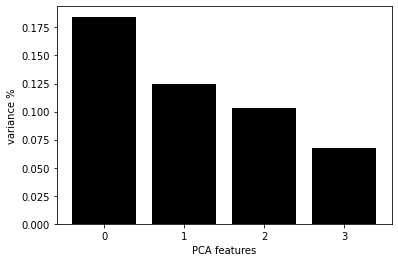

In [553]:
from sklearn.decomposition import PCA
X_std = StandardScaler().fit_transform(df)
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 3')

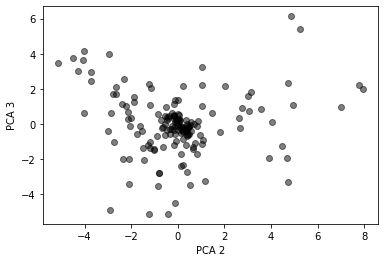

In [556]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.5, color='black')
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

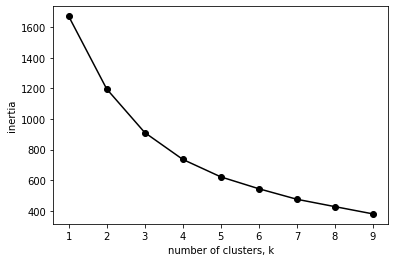

In [555]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()